## Running k-means on Cancer incidents data set

## Importing libraries required

In [66]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pylab as pl

In [67]:
pathk=r'/Users/keerthiputti/Downloads/Achievement 6/cancer incidents/02 Data/Prepared Data'

In [68]:
df =pd.read_csv(os.path.join(pathk, 'Cancer_incidents_1819.csv'),index_col=False)

In [69]:
df[df['Count']>3500]

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
256,Breast,California,2018,60-64 years,Female,F,3759.0,1168986.0,321.6,West,Middle age group,64.0
257,Breast,California,2018,65-69 years,Female,F,3921.0,978836.0,400.6,West,Elderly group,69.0
258,Breast,California,2018,70-74 years,Female,F,3622.0,769806.0,470.5,West,Elderly group,74.0
10980,Prostate,California,2018,60-64 years,Male,M,3727.0,1084647.0,343.6,West,Middle age group,64.0
10981,Prostate,California,2018,65-69 years,Male,M,4886.0,864825.0,565.0,West,Elderly group,69.0
10982,Prostate,California,2018,70-74 years,Male,M,3633.0,656564.0,553.3,West,Elderly group,74.0
11223,Prostate,New York,2018,65-69 years,Male,M,3533.0,474732.0,744.2,North-East,Elderly group,69.0
11324,Prostate,Texas,2018,65-69 years,Male,M,3735.0,573350.0,651.4,South,Elderly group,69.0
16898,Prostate,California,2019,60-64 years,Male,M,3888.0,1097086.0,354.4,West,Middle age group,64.0
16899,Prostate,California,2019,65-69 years,Male,M,5263.0,883216.0,595.9,West,Elderly group,69.0


In [70]:
df=df[df['Count']<3500]

In [71]:
df.shape

(24425, 12)

In [72]:
df.head()

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
0,Brain and Other Nervous System,Alabama,2018,60-64 years,Female,F,23.0,168342.0,13.7,South,Middle age group,64.0
1,Brain and Other Nervous System,Alabama,2018,65-69 years,Female,F,21.0,145302.0,14.5,South,Elderly group,69.0
2,Brain and Other Nervous System,Alabama,2018,70-74 years,Female,F,23.0,117686.0,19.5,South,Elderly group,74.0
3,Brain and Other Nervous System,Alabama,2018,75-79 years,Female,F,19.0,84846.0,22.4,South,Elderly group,79.0
4,Brain and Other Nervous System,Alabama,2018,80-84 years,Female,F,18.0,58233.0,30.9,South,Elderly group,84.0


## Elbow technique

In [73]:
df_clust=df[['Count','Population','Crude Rate','Age_max']]

In [74]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [75]:
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1571979797499432.0,
 -472282266112583.94,
 -244618128077250.56,
 -123646362313156.2,
 -72991120189114.22,
 -49793415436999.02,
 -37052361092930.24,
 -29396086406864.477,
 -24902996808356.445]

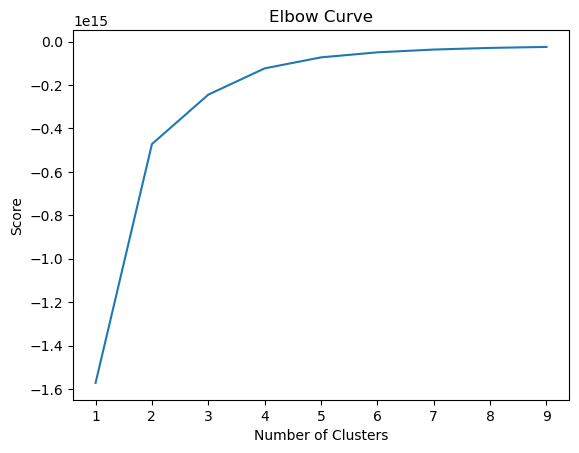

In [76]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4 clusters will be good considering the elbow starts at 4.

In [77]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [78]:
# Fit the k-means object to the data.

kmeans.fit(df_clust)

KMeans(n_clusters=4)

In [79]:
# adding the predicyion on to the main data frame

df['clusters'] = kmeans.fit_predict(df_clust)

In [80]:
df.head()

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max,clusters
0,Brain and Other Nervous System,Alabama,2018,60-64 years,Female,F,23.0,168342.0,13.7,South,Middle age group,64.0,3
1,Brain and Other Nervous System,Alabama,2018,65-69 years,Female,F,21.0,145302.0,14.5,South,Elderly group,69.0,3
2,Brain and Other Nervous System,Alabama,2018,70-74 years,Female,F,23.0,117686.0,19.5,South,Elderly group,74.0,3
3,Brain and Other Nervous System,Alabama,2018,75-79 years,Female,F,19.0,84846.0,22.4,South,Elderly group,79.0,3
4,Brain and Other Nervous System,Alabama,2018,80-84 years,Female,F,18.0,58233.0,30.9,South,Elderly group,84.0,3


In [81]:
df['clusters'].value_counts()

3    14335
1     7467
0     1850
2      773
Name: clusters, dtype: int64

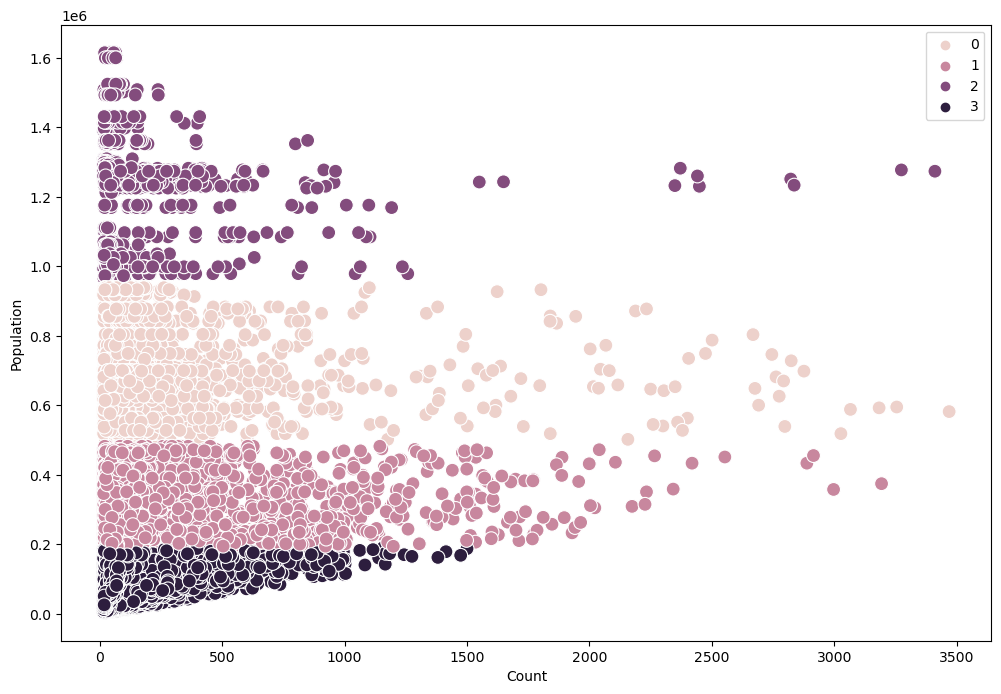

In [82]:
# Plot the clusters for the "Count" and "Population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Count'], y=df['Population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Count') # Label x-axis.
plt.ylabel('Population') # Label y-axis.
plt.show()

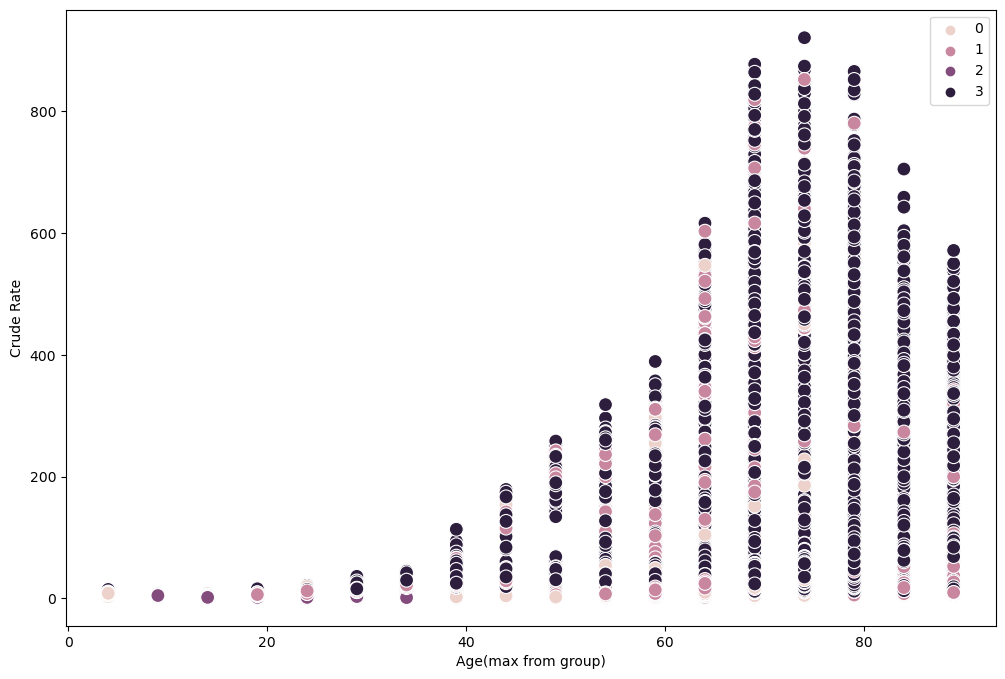

In [83]:
# Plot the clusters for the "Crude rate" and "Age_max" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age_max'], y=df['Crude Rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age(max from group)') 
plt.ylabel('Crude Rate') 
plt.show()

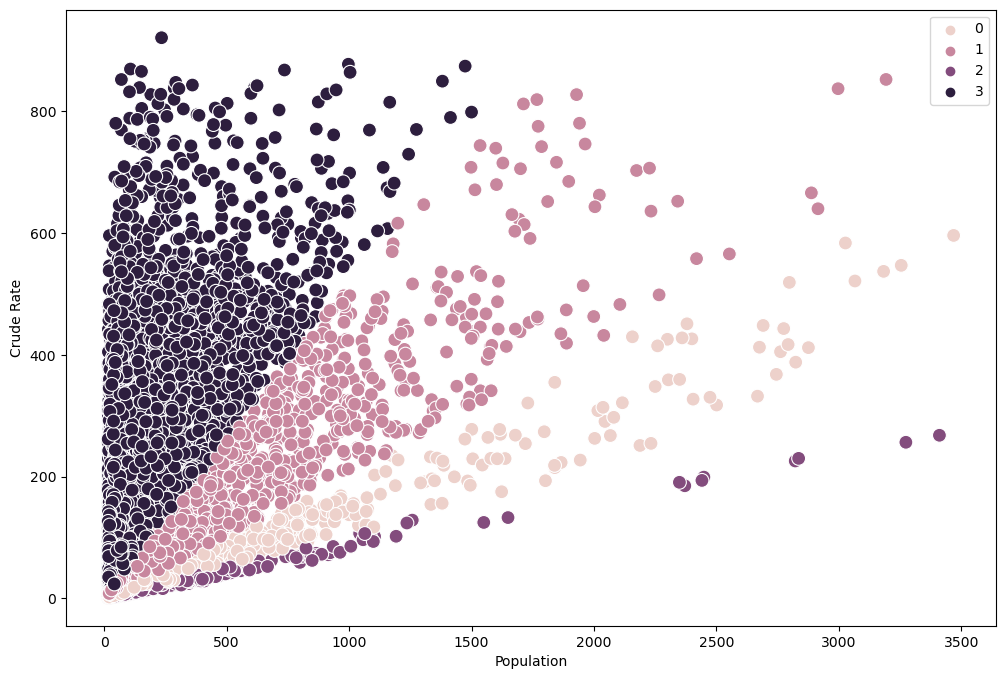

In [84]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Count'], y=df['Crude Rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('Crude Rate') 
plt.show()

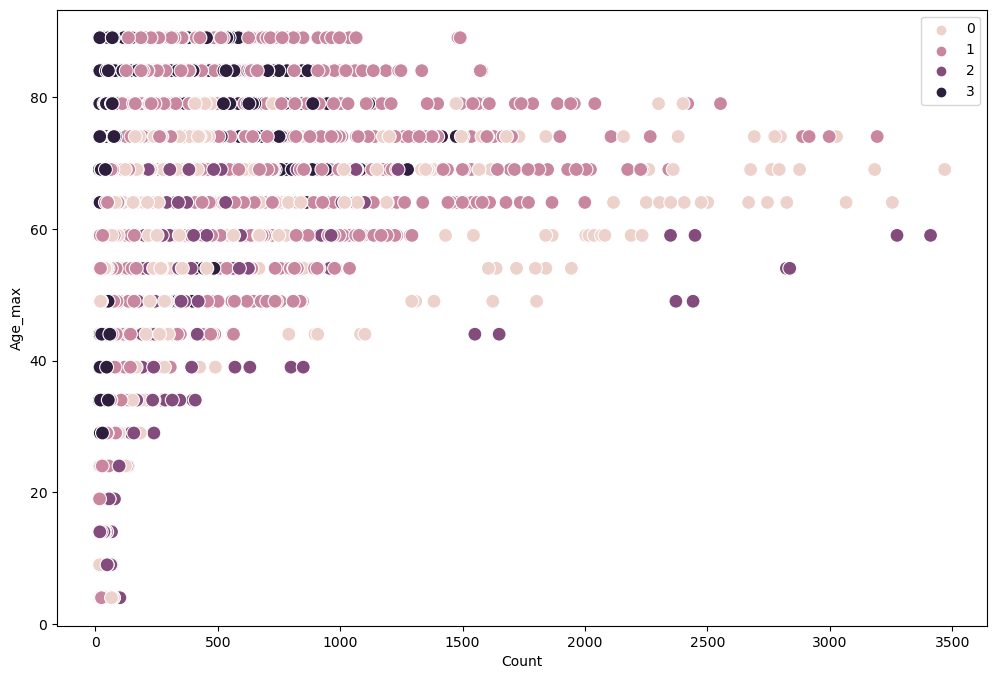

In [85]:
# Plot the clusters for the "Count" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Count'], y=df['Age_max'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Count') 
plt.ylabel('Age_max') 
plt.show()

Text(0.5, 0, 'Age(max from group)')

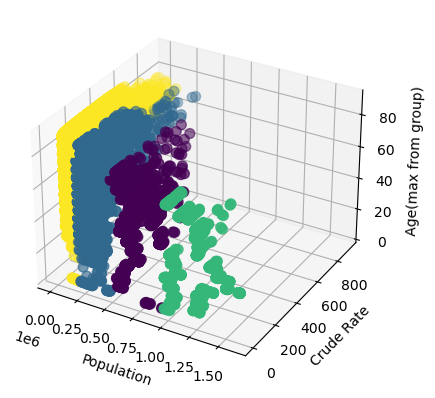

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Population'])
y = np.array(df['Crude Rate'])
z = np.array(df['Age_max'])
ax.scatter(x,y,z, c=[kmeans.labels_], s=50)
ax.set_xlabel("Population")
ax.set_ylabel("Crude Rate") 
ax.set_zlabel("Age(max from group)")

In [87]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'black'

In [88]:
df.groupby('cluster').agg({'Count':['mean', 'median'], 
                         'Population':['mean', 'median'], 
                         'Crude Rate':['mean', 'median'],
                          'Age_max':['mean','median']})

Count           Population             Crude Rate         \
                   mean median          mean     median        mean median   
cluster                                                                      
black         84.852389   43.0  9.205197e+04    86776.0  118.142463   62.3   
dark purple  187.574386   75.0  1.213054e+06  1240967.0   15.778655    6.2   
light pink   250.610811  110.0  6.937439e+05   670181.0   37.443135   15.7   
pink         150.703228   62.0  2.947318e+05   281776.0   52.183420   22.4   

               Age_max         
                  mean median  
cluster                        
black        71.289850   74.0  
dark purple  42.855110   44.0  
light pink   54.781081   59.0  
pink         59.224990   59.0

In [89]:
df.groupby('cluster').agg({'Count':['median'], 
                         'Population':['median'], 
                         'Crude Rate':['median'],
                          'Age_max':['median']})

,Count,Population,Crude Rate,Age_max
,median,median,median,median
cluster,,,,
black,43.0,86776.0,62.3,74.0
dark purple,75.0,1240967.0,6.2,44.0
light pink,110.0,670181.0,15.7,59.0
pink,62.0,281776.0,22.4,59.0


## Understading from the clusters -

From the output I can understadnd the clusters are created mostly based on population distribution.
Because there was huge difference between the ranges of variable count, population and age, the clustering seems to be biased and clustere on population. hence we will conduct data standardization using PCA(Pricipal componenet analysis) and run k-means again to see how it will change and what insights the clustering would being out.

## Standardizing using principal component analysis.

In [90]:
#importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [91]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_clust)


In [92]:
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [93]:
pca.explained_variance_ratio_

array([0.4561318 , 0.33432059, 0.13204283, 0.07750479])

Text(0, 0.5, 'Cummulative explained variance')

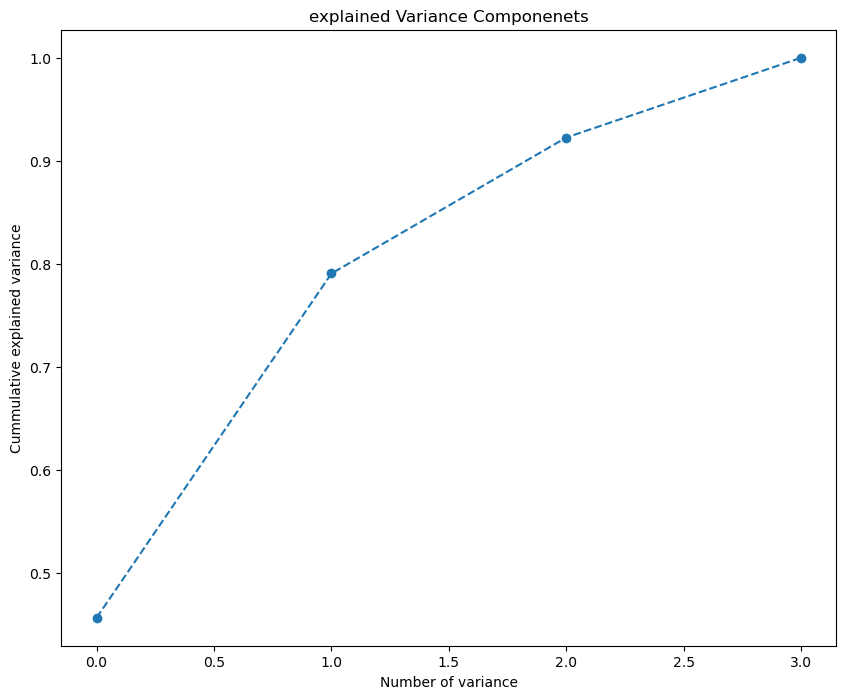

In [94]:
plt.figure(figsize=(10,8))
plt.plot(range(0,4),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('explained Variance Componenets')
plt.xlabel('Number of variance')
plt.ylabel('Cummulative explained variance')

In [95]:
# From previous graph, we can see we can use 3 or 4 components. We use 3 components as it covers 90%
pca=PCA(n_components=3)

In [96]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [97]:
pca.transform(segmentation_std)

array([[-0.4597652 , -0.60634308, -0.00896288],
       [-0.24609469, -0.75485993, -0.20127044],
       [ 0.00248826, -0.89173612, -0.37265544],
       ...,
       [ 0.55095267, -0.76881227, -0.413231  ],
       [ 0.7763831 , -0.96007959, -0.57526363],
       [ 0.97546542, -0.95438436, -0.8321846 ]])

In [98]:
scores_pca=pca.transform(segmentation_std)

In [99]:
#fitting PCA to k-means

wcss=[]
for i in range(1,10):
    kmeans_pca=KMeans(n_clusters = i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

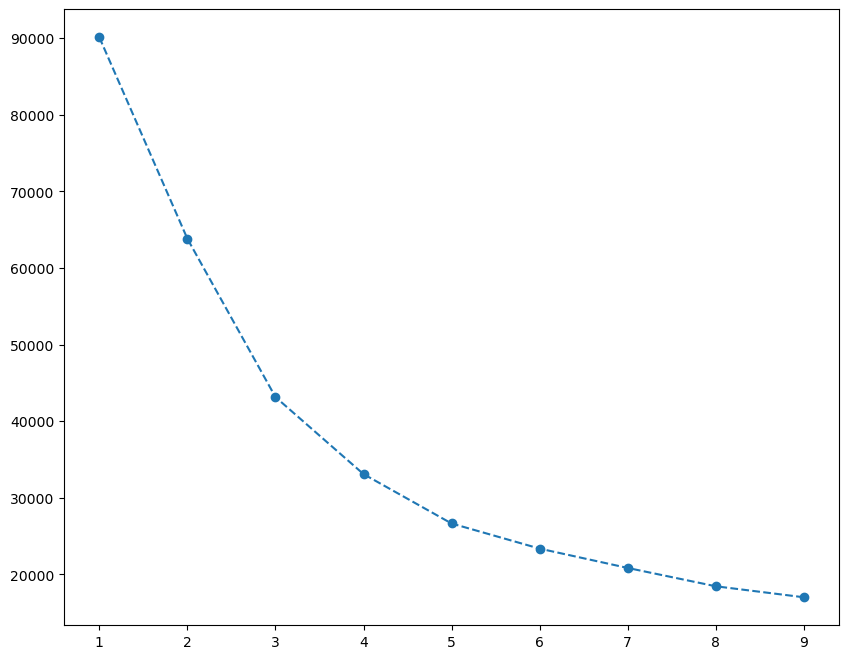

In [100]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wcss,marker='o',linestyle = '--')
plt.xlabel=('Number of Clusters')
plt.ylabel=('WCSS')
plt.titke=('K-means with PCA clustering')
plt.show()

In [101]:
# from the gRaph above, we can understand the elbow bents between 4-5 . For this scenario, we will go with 4.

kmeans_pca=KMeans(n_clusters=4 , init ='k-means++', random_state=42)

In [102]:
# fitting data with k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [103]:
scores_pca.shape

(24425, 3)

In [104]:
df_seg_pca_kmean=pd.concat([df_clust.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_seg_pca_kmean['Segment K-means PCA']=kmeans_pca.labels_

In [105]:
df_seg_pca_kmean

,Count,Population,Crude Rate,Age_max,0,1,2,Segment K-means PCA
0,23.0,168342.0,13.7,64.0,-0.459765,-0.606343,-0.008963,1
1,21.0,145302.0,14.5,69.0,-0.246095,-0.754860,-0.201270,0
2,23.0,117686.0,19.5,74.0,0.002488,-0.891736,-0.372655,0
3,19.0,84846.0,22.4,79.0,0.240266,-1.064343,-0.538668,0
4,18.0,58233.0,30.9,84.0,0.499799,-1.200378,-0.699716,0
...,...,...,...,...,...,...,...,...
24420,41.0,173144.0,23.7,69.0,-0.217068,-0.606713,-0.232188,0
24421,76.0,133024.0,57.1,74.0,0.245234,-0.603641,-0.299633,0
24422,69.0,94842.0,72.8,79.0,0.550953,-0.768812,-0.413231,0
24423,53.0,67245.0,78.8,84.0,0.776383,-0.960080,-0.575264,0


In [106]:
# adding the predicyion on to the main data frame

df['clusters-2'] = kmeans.fit_predict(scores_pca)

In [107]:
df

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max,clusters,cluster,clusters-2
0,Brain and Other Nervous System,Alabama,2018,60-64 years,Female,F,23.0,168342.0,13.7,South,Middle age group,64.0,3,black,3
1,Brain and Other Nervous System,Alabama,2018,65-69 years,Female,F,21.0,145302.0,14.5,South,Elderly group,69.0,3,black,1
2,Brain and Other Nervous System,Alabama,2018,70-74 years,Female,F,23.0,117686.0,19.5,South,Elderly group,74.0,3,black,1
3,Brain and Other Nervous System,Alabama,2018,75-79 years,Female,F,19.0,84846.0,22.4,South,Elderly group,79.0,3,black,1
4,Brain and Other Nervous System,Alabama,2018,80-84 years,Female,F,18.0,58233.0,30.9,South,Elderly group,84.0,3,black,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436,"Urinary Bladder, invasive and in situ",Wisconsin,2019,65-69 years,Female,F,41.0,173144.0,23.7,Mid-West,Elderly group,69.0,3,black,1
24437,"Urinary Bladder, invasive and in situ",Wisconsin,2019,70-74 years,Female,F,76.0,133024.0,57.1,Mid-West,Elderly group,74.0,3,black,1
24438,"Urinary Bladder, invasive and in situ",Wisconsin,2019,75-79 years,Female,F,69.0,94842.0,72.8,Mid-West,Elderly group,79.0,3,black,1
24439,"Urinary Bladder, invasive and in situ",Wisconsin,2019,80-84 years,Female,F,53.0,67245.0,78.8,Mid-West,Elderly group,84.0,3,black,1


In [108]:
df['clusters-2'].value_counts()

1    10995
3     9051
2     2392
0     1987
Name: clusters-2, dtype: int64

In [109]:
# restarting matplotlib

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

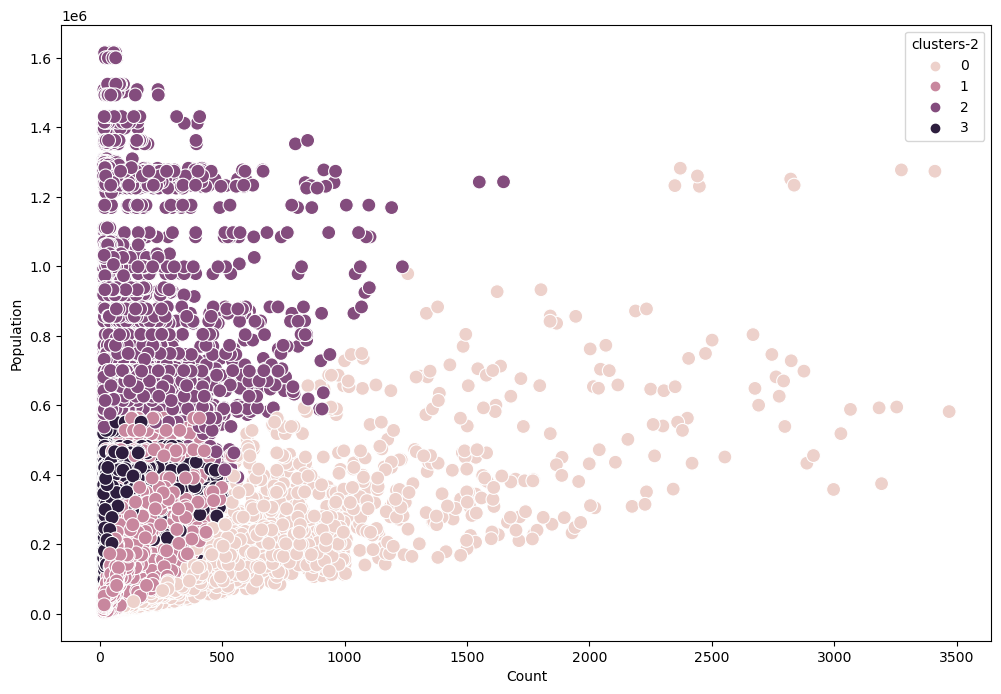

In [110]:
# Plot the clusters for the "Count" and "Population" variables.

plt.figure(figsize=(12,8))
aa = sns.scatterplot(x=df['Count'], y=df['Population'], hue=df['clusters-2'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
aa.grid(False) # This removes the grid from the background.
plt.xlabel('Count') # Label x-axis.
plt.ylabel('Population') # Label y-axis.
plt.show()

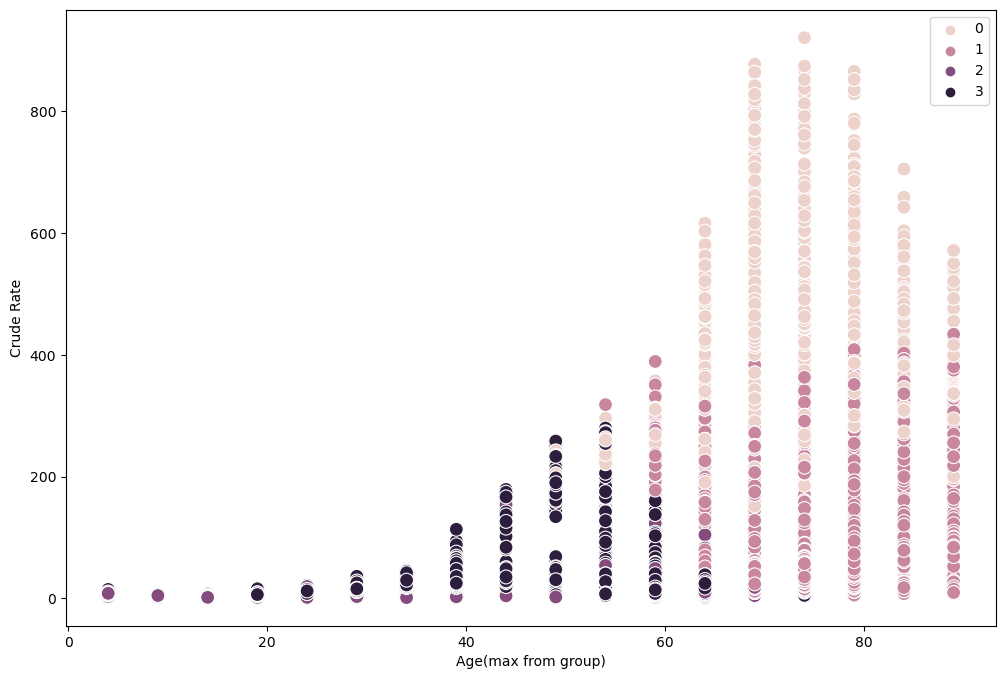

In [111]:
# Plot the clusters for the "Crude rate" and "Age_max" variables.

plt.figure(figsize=(12,8))
ab = sns.scatterplot(x=df['Age_max'], y=df['Crude Rate'], hue=kmeans.labels_, s=100)

ab.grid(False) 
plt.xlabel('Age(max from group)') 
plt.ylabel('Crude Rate') 
plt.show()

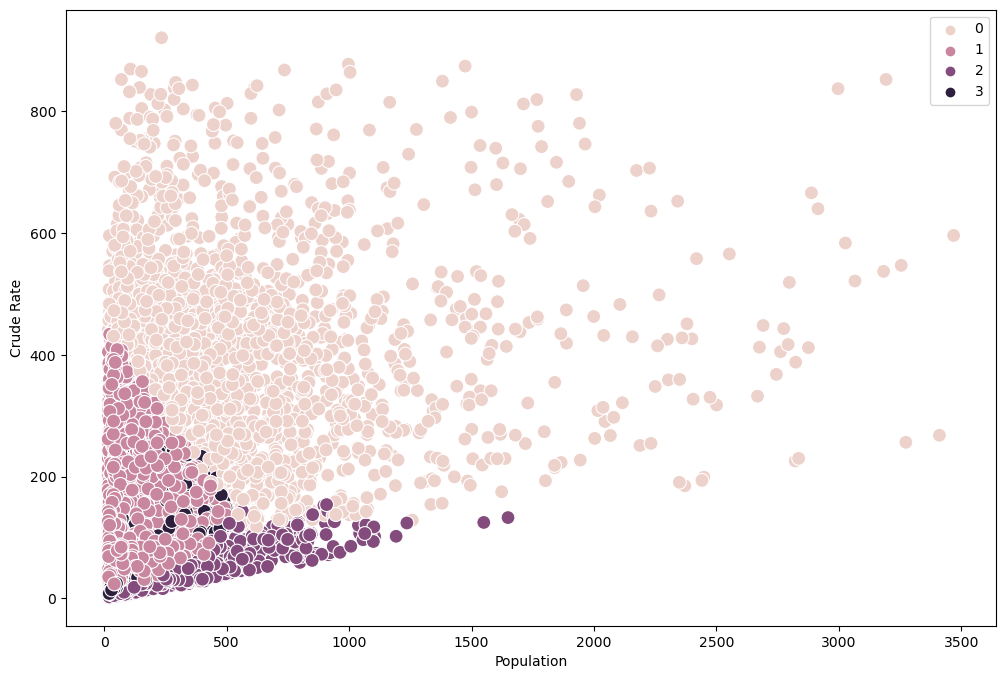

In [112]:
# Plot the clusters for the "Count" and "Crude Rate" variables.

plt.figure(figsize=(12,8))
ac = sns.scatterplot(x=df['Count'], y=df['Crude Rate'], hue=kmeans.labels_, s=100)

ac.grid(False) 
plt.xlabel('Population') 
plt.ylabel('Crude Rate') 
plt.show()

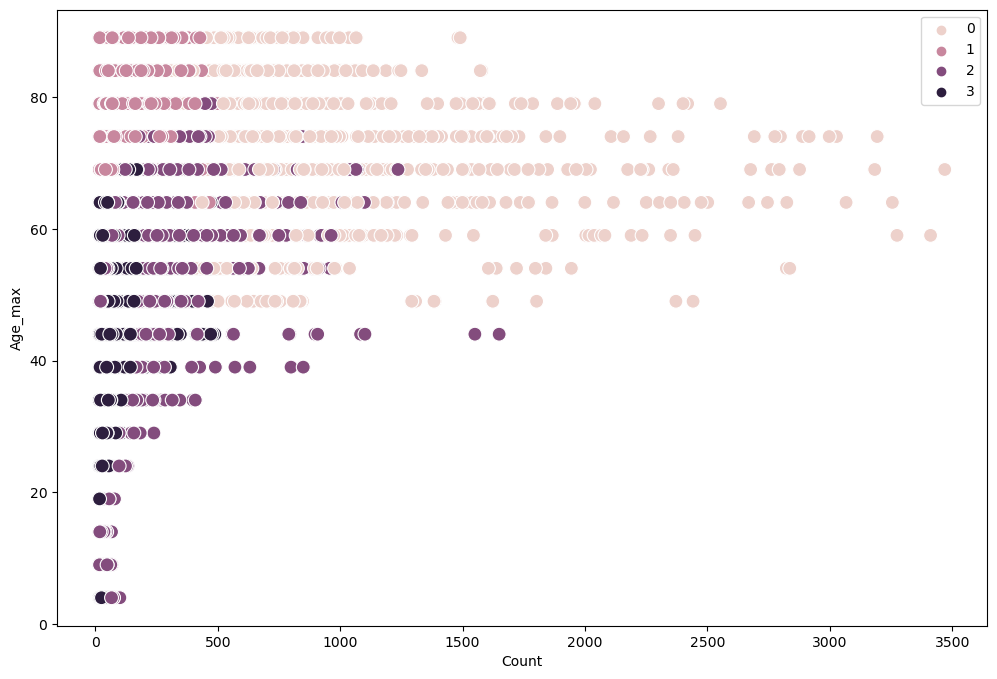

In [113]:
# Plot the clusters for the "Count" and "age"variables.

plt.figure(figsize=(12,8))
ad = sns.scatterplot(x=df['Count'], y=df['Age_max'], hue=kmeans.labels_, s=100)

ad.grid(False) 
plt.xlabel('Count') 
plt.ylabel('Age_max') 
plt.show()

Text(0.5, 0, 'Age(max from group)')

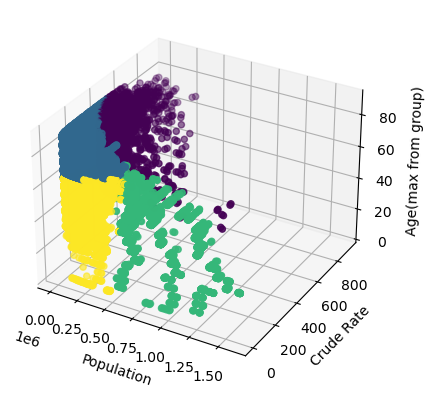

In [114]:
fig = plt.figure()
aa = fig.add_subplot(111, projection='3d')
x = np.array(df['Population'])
y = np.array(df['Crude Rate'])
z = np.array(df['Age_max'])
aa.scatter(x,y,z, c=[kmeans.labels_], s=20)
aa.set_xlabel("Population")
aa.set_ylabel("Crude Rate") 
aa.set_zlabel("Age(max from group)")

In [115]:
df.loc[df['clusters-2'] == 2, 'clusters-2_clr'] = 'dark purple'
df.loc[df['clusters-2'] == 1, 'clusters-2_clr'] = 'pink'
df.loc[df['clusters-2'] == 0, 'clusters-2_clr'] = 'light pink'
df.loc[df['clusters-2'] == 3, 'clusters-2_clr'] = 'black'

In [116]:
df.groupby('clusters-2_clr').agg({'Count':['mean', 'median'], 
                         'Population':['mean', 'median'], 
                         'Crude Rate':['mean', 'median'],
                          'Age_max':['mean','median']})

Count            Population            Crude Rate         \
                      mean median           mean    median        mean median   
clusters-2_clr                                                                  
black            59.617611   37.0  225240.755276  209497.0   32.020517   21.5   
dark purple     166.481187   93.0  867787.025084  762358.0   21.188503   11.0   
light pink      585.618520  452.0  174034.865627  115720.0  414.900101  410.7   
pink             77.202274   49.0  116528.969623   87102.0   90.930914   65.8   

                  Age_max         
                     mean median  
clusters-2_clr                    
black           52.800685   54.0  
dark purple     49.403428   54.0  
light pink      74.727227   74.0  
pink            77.679854   79.0

This kmean clustering seems much cleaner and not weighed on just population.
Light pink is higher age and low-med count and crude rate , pink is higher age higher count.
black is 20-60 age and under 400 crude rate and low-mid count.
dark purple is low count, crude rate. 

In [117]:
# Exporting this for final presentation
df.to_csv(os.path.join(pathk,'Data_1819_clusters.csv'),index=False)